# Tutorial NLTK


##Instalación

- Descargando la librería

In [ ]:
!pip install nltk
import nltk

- Descargando paquetes

Podemomos selecionar **d)Download** y en el nombre del paquete indicar o el paquete que queremos instalar o **all** para descargar todos los paquetes

In [ ]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!


True

## ¿Como trabajar con NLTK?

1. Primero siempre importamos la libraría **nltk**

In [ ]:
import nltk

2. Despues importamos el paquete que queremos usar y la clase dentro de ese paquete que usaremos. Tenemos información completa de los paquetes y las clases en la pagina Web de nltk: https://www.nltk.org/api/nltk.html


Para el ejemplo, vamos a usar la clase **PorterStemmer**, que implementa el algoritmo Porter Stemmer dentro del paquete **stem**, para funcionalidades de Stemmer

In [ ]:
from nltk.stem import PorterStemmer

3. Ahora creamos una instancia de la clase que queremos usar

In [ ]:
word_stemmer = PorterStemmer()

4. Ahora podemos trabajar con la instancia de la clase, en este caso, vamos a obtener el lexema de *writting*

In [ ]:
word_stemmer.stem('writing')

'write'

## Tokenización con NLTK

La tokenización es el proceso de dividir un corpus en partes que seran procesadas, esta división habitualmente suele ser en:
- Frases
- Palabras

Para ello, tenemos que acceder al paquete **nltk.tokenize**, que contiene todos los tokenizadores disponibles para nltk

### Tokenizadores en NLTK

#### word_tokenize

El un tokenizador básico, usado para tokenizar en palabras

Por ejemplo

In [1]:
import nltk
from nltk.tokenize import word_tokenize
word_tokenize("En este curso vamos a aprender a usar nltk?.")

LookupError: ignored

#### La clase **TreebankWordTokenizer**

> Bloque con sangría



Habitualmente no trabajamos directamente con el tokenizador, sino que lo hacemos a partir de una instancia de la clase TreebankWordTokenizer, que contiene varios tokenizadores

1. Importamos nltk

In [ ]:
import nltk

2. Cargamos la clase TreebankWordTokenizer desde el paquete tokenize, que implementa el algoritmo word tokenizer

In [ ]:
from nltk.tokenize import TreebankWordTokenizer

3. Creamos una instancia de la clase

In [ ]:
tokenizer = TreebankWordTokenizer()

4. Ahora llamamso a la funcion de tokenizado que no sinterese, que tipicamente puesden ser:
- tokenize: Para tokenizar en palabras
- tokenize_sent: Para tokenizar en frases

Hay muchas más tokenizadores dentro de esta clase y se recomienda consultarlos en la web de la librería: https://www.nltk.org/_modules/nltk/tokenize/treebank.html

In [ ]:
tokenizer.tokenize("En este curso vamos a aprender a usar nltk.")

['En', 'este', 'curso', 'vamos', 'a', 'aprender', 'a', 'usar', 'nltk', '.']

Esta tokenización es igual a la anterior por que estamos usando el mismo algortimo, pero esta vez mediante la clase TreebankWordTokenizer

Hay algunos casos en los que no funciona bien esta tokenización, por ejemplo:

In [ ]:
tokenizer.tokenize("'won't'")

["'wo", "n't", "'"]

Por eso existen otras clases, que realizan otros tipos de tokenización

#### La clase **WordPunktTokenizer**

Esta clase, se comporta mejor ante los signos de puntuación, separandolo en tokens distintos

In [ ]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
tokenizer.tokenize("I can't allow you don´t learn nltk library")


['I',
 'can',
 "'",
 't',
 'allow',
 'you',
 'don',
 '´',
 't',
 'learn',
 'nltk',
 'library']

#### Tokenización de un texto en frases

Dependiendo el proposito puede interesarnos separar el texto en frases

#### sent_tokenize

Es el tokenizador por frases mas usado, podemos usarlo importandolo directamente:

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
text = "In this course we go to understand the difference between sentence & word tokenizer. It is going to be a simple example."
sent_tokenize(text)

['In this course we go to understand the difference between sentence & word tokenizer.',
 'It is going to be a simple example.']

#### Tokenización de frases por expresiones regulares

En ocasiones necesitamos un control total, por que la salida no es aceptable, probablemente por las peculiaridades de un determinado idioma o texto


En el primer ejemplo, vamos a usar un Tokenizador por expresión regular para mantener como plabras todos los caracteres consecurtivos, incluido el apostrofe

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']+")
print(tokenizer.tokenize("won't is a contraction."))
print(tokenizer.tokenize("can't is a contraction."))

["won't", 'is', 'a', 'contraction']
["can't", 'is', 'a', 'contraction']


En el siguiente ejemplo, usamos el espacio para distingir palabras, el parámetro gaps si es true, indica que la expresión regular indica donde queremos separar las palabras (en este caso cada vez que encontremos un espacio)

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\s+', gaps = True)
tokenizer.tokenize("won't is a contraction.")


["won't", 'is', 'a', 'contraction.']

Si ponemos gaps = False, estamos indicando que el patrón indica lo que es una palabra, asi que nos quedamos con lo que coincida con la expresión regular y despreciamos el resto

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']+", gaps = False)
tokenizer.tokenize("won't is a contraction.")

["won't", 'is', 'a', 'contraction']

### Entrenamiento de tokenizador

El tokenizador de frases por defecto en NLTK, es un tokenizador de proposito general, pero dependiendo del texto, puede que no funcione correctamente, por ese motivo puede ser conveneinte entrenar un tokenidor propio, adaptado al texto y al idioma que queremos tokenizar

1. Leemos un fichero de drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
PATH_DATA= '/content/drive/MyDrive/Colab Notebooks/nlp_introduction_course/data'
FILE_NAME = 'data for training tokenizer.txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from nltk.tokenize import PunktSentenceTokenizer
from nltk.corpus import webtext

text = ""
with open(f'{PATH_DATA}/{FILE_NAME}', "r") as f:
  text = f.read()
print(text)


White guy: So, do you have any plans for this evening?
Asian girl: Yeah, being angry!
White guy: Oh, that sounds good.

Guy #1: So this Jack guy is basically the luckiest man in the world.
Guy #2: Why, because he's survived like 5 attempts on his life and it's not even noon?
Guy #1: No; he could totally nail those two chicks.

Dad: Could you tell me where the auditorium is?
Security guy: It's on the second floor.
Dad: Wait, you mean it's actually in the building?

Girl: But, I mean, it's not like I ever plan on giving birth.
Guy: Well, if your mother gave birth, it's like your chances are good that you'll give birth too.
Girl: ...Uh, dude, mother gave birth.
Guy: Absolutely.
Guy #1: I don't mind getting old; I love getting old.
Guy #2: Yeah, just as long as you don't get pregnant.

Hobo: Can you spare any change?
Man: Sorry, no.
Hobo: Who the hell you saying no to? I wasn't asking you anyway, asshole!

Hobo: Excuse me, this is a picture of my daughter Sofiya, she was in a fire recently

Como podemos ver, este texto esta formateado como un dialogo

Vamos a hacer un tokenizador de frases con **sent_tokenize**

In [ ]:
from nltk.tokenize import sent_tokenize
from nltk.corpus import webtext
sents_2 = sent_tokenize(text)
print("Numero de frases de sent_tokenize: ", len(sents_2))

Numero de frases de sent_tokenize:  1277


Y otro entrenado a partir del texto con **PunktSentenceTokenizer** 

In [ ]:
from nltk.tokenize import PunktSentenceTokenizer
sent_tokenizer = PunktSentenceTokenizer(text)
sents_1 = sent_tokenizer.tokenize(text)
print("Numero de frases PunktSentenceTokenizer: ", len(sents_1))

Numero de frases PunktSentenceTokenizer:  1274


Como vemos no coincide el número total de frases, por lo tanto se puede inferir que alguno lo ha hecho mejor que otro. Para comprobarlo, vamos a buscar las diferencias

In [ ]:
# Para PunktSentenceTokenizer, la linea 171 es esta
sents_1[171]

'HS girl #1: Like Hitler...'

In [ ]:
# Para sent_tokenize, la linea 171 es esta
sents_2[171]

"HS girl #1: Like Hitler...\nHS girl #3: That's crazy."

Como vemos, sent_tokenize no ha separado bien esta linea

Por lo tanto, en ocasiones, puede ser conveniente entrenar nuestro propio tokenizador

## Stop Words

Son palabras que aportan poco o ningún singificado a la frase

Eliminarlas reducira la complejidad, y el tiempo necesario para procesar

Tipicamente son articulos, preposiciones, adverbios....

En el paquete **nltk.corpus** podemos encontrar un listado de Stor Words, en múltiples idiomas

In [ ]:
from nltk.corpus import stopwords

Por ejemplo en ingles

In [ ]:
english_stops = set(stopwords.words('english'))
print(english_stops)


{'and', 'yourself', 'by', "hadn't", "aren't", "it's", 'about', 'y', 'between', 'further', 'it', 'only', 'haven', 'some', "doesn't", 'will', 'in', 'own', 'can', "weren't", 'have', 'his', 'which', 'needn', 'ma', 'why', 'on', 'she', 'were', 'then', 'should', 'i', 'here', 'both', 'above', 'them', 'yours', 'our', 'from', 'we', 'after', 'below', 'he', 'that', 'not', 'so', 'me', 'against', 'couldn', 'be', 'before', 'weren', 'those', "shan't", "wouldn't", 'all', 'an', 'very', 'shouldn', 'does', 'd', 'their', 'o', 'aren', 'doing', 'been', "haven't", 'under', "wasn't", 'himself', 'wouldn', 'theirs', 'each', 'her', 'most', "she's", 'off', "mustn't", 'what', 'mightn', 'to', 'for', 'through', 'wasn', 'of', 'when', "needn't", "that'll", 'isn', 'once', 'you', 'this', 'at', 'with', 'more', 'ours', "don't", 'while', 'its', 'am', 'has', 'yourselves', 'over', 'how', 'or', 'shan', 's', 'now', 'are', 't', "you've", 'a', 'who', 'during', 'won', 'same', 'doesn', 'had', 'him', "shouldn't", 'but', 'themselves'

O en español

In [ ]:
spanish_stops = set(stopwords.words('spanish'))
print(spanish_stops)

{'habido', 'tendrás', 'estarás', 'esas', 'tuyas', 'estad', 'hubieras', 'hubiésemos', 'esté', 'habidas', 'otra', 'sería', 'estuviste', 'qué', 'estuvieron', 'fui', 'habréis', 'estuvieses', 'estuvisteis', 'habría', 'en', 'estuvo', 'todos', 'o', 'tuvieras', 'hayas', 'hubimos', 'tuvo', 'ellos', 'antes', 'algunos', 'esto', 'habrían', 'tendrían', 'otras', 'también', 'estados', 'has', 'estuvieseis', 'sin', 'ante', 'los', 'éramos', 'ellas', 'hubo', 'tuviéramos', 'vuestras', 'tenga', 'el', 'este', 'teníais', 'estarán', 'estarías', 'había', 'les', 'sintiendo', 'fueses', 'fuera', 'algunas', 'os', 'otro', 'tuvieses', 'fue', 'del', 'mucho', 'tendremos', 'unos', 'estaríais', 'habremos', 'tenemos', 'sea', 'fueron', 'estuvieran', 'sentido', 'vosotros', 'estado', 'estar', 'sentid', 'soy', 'tenido', 'estaré', 'estabais', 'esa', 'porque', 'muy', 'otros', 'he', 'estuve', 'estaremos', 'me', 'su', 'tuviesen', 'estará', 'habías', 'quien', 'habida', 'eras', 'tuyo', 'ella', 'hubiera', 'habían', 'sí', 'tuvieran'

Es conveniente limpiar las stop words de nuestras frases, a continuación vamos a crear una función que indicando el idioma y la frase elimine las Stop Words

In [ ]:
def remove_stopwors(words,language='english'):
  from nltk.corpus import stopwords
  stop_words = set(stopwords.words(language))
  return [word for word in words if word not in stop_words]


Y probamos la función (en ingles)

In [ ]:
remove_stopwors(['I', 'am', 'doing', 'a','exercise','of','the','nltk','library'])

['I', 'exercise', 'nltk', 'library']

Y ahora en español

In [ ]:
remove_stopwors(['Yo', 'estoy', 'haciendo', 'un', 'ejercicio', 'de', 'la', 'libreria', 'nltk'],'spanish')

['Yo', 'haciendo', 'ejercicio', 'libreria', 'nltk']

Puedo obtener una lista de los idiomas soportados para stopwords en el paquete nltk.corpus

In [ ]:
from nltk.corpus import stopwords
stopwords.fileids()

['arabic',
 'azerbaijani',
 'bengali',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

## Búscando palabras con WordNet

**WordNet** es una base de datos lexica, para palabras en ingles, hecha por la universidad de Princeton. Esta integrada en el paquete **corpus**, e incorpora nombres, verbos, adjetivos y advervios. Permite dar soporte a las siguientes necesidades:

- Obtener la definición de una palabra
- Encontrar sinonimos
- Relaciones entre palabras
- Desambiguaciones entre palabras con multiples significados

Para usarlo Importamos wordnet del paquete corpus

In [ ]:
from nltk.corpus import wordnet as wn

**Instancias Synset**: Agrupan sinonimos de palabras que expresan el mismo concepto

In [ ]:
# Muestra todos los synset relacionados con 'dog'
wn.synsets('dog')

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01'),
 Synset('chase.v.01')]

Centrandonos en el primero

In [ ]:
syn = wn.synsets('dog')[0]

Podemos obtener su nombre

In [ ]:
syn.name()

'dog.n.01'

La definición

In [ ]:
syn.definition()

'a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds'

Ejemplos de uso

In [ ]:
syn.examples()

['the dog barked all night']

La jerarquia de clases a la que pertenece

In [ ]:
syn.hypernyms()

[Synset('canine.n.02'), Synset('domestic_animal.n.01')]

Podemos a su vez obtener la clase padre, de la clase padre

In [ ]:
syn.hypernyms()[0].hypernyms()

[Synset('carnivore.n.01')]

O la clase raiz a la que pertenece

In [ ]:
syn.root_hypernyms()

[Synset('entity.n.01')]

### Lematización en Wordnet

En linguistica, un lema es la palabra canonica o raiz de la que se deriva una palabra.

In [ ]:
from nltk.corpus import wordnet as wn
syn = wn.synsets('dog')[0]
lemmas = syn.lemmas()
lemmas

[Lemma('dog.n.01.dog'),
 Lemma('dog.n.01.domestic_dog'),
 Lemma('dog.n.01.Canis_familiaris')]

Tambien nos permite encontrar antonimos


In [ ]:
from nltk.corpus import wordnet as wn
syn1 = wn.synset('good.n.02')
antonym1 = syn1.lemmas()[0].antonyms()[0]
antonym1.name()


'evil'

In [ ]:
antonym1.synset().definition()

'the quality of being morally wrong in principle or practice'

## Stemming

Es la técnica para extraer la base de las palabras, eliminando prefijos y sufijos. Esto simplifica el número de palabras de un texto

Exiten múltiples algoritmos, en nltk tenemos los siguentes

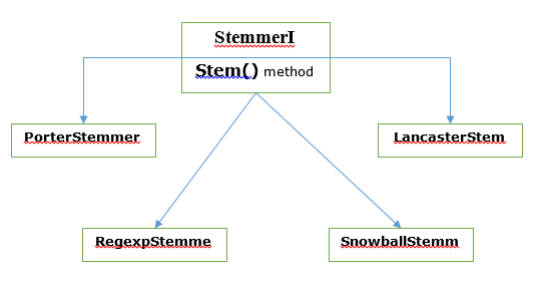

Los algotirmos de Stemming, estan principalmente en el paquete **nltk.stem**

## Algoritmo Stemming Porter

Es uno de los más comunes. Esta diseñado para eliminar los sufijos en ingles

In [ ]:
import nltk # Importamos nltk
from nltk.stem import PorterStemmer # Importamos las clase PorterStemmer del paquete stem
word_stemmer = PorterStemmer()
for word in ['Writing','Eating','Cars','slowly']:
  print(word + ' --> ' +word_stemmer.stem(word))

Writing --> write
Eating --> eat
Cars --> car
slowly --> slowli


## Algoritmo Stemming Lancaster

Es un algoritmo hecho por la universidad de Lancaster

In [ ]:
import nltk # Importamos nltk
from nltk.stem import LancasterStemmer # Importamos las clase LancasterStemmer del paquete stem
word_stemmer = LancasterStemmer()
for word in ['Writing','Eating','Cars','slowly']:
  print(word + ' --> ' +word_stemmer.stem(word))

Writing --> writ
Eating --> eat
Cars --> car
slowly --> slow


## Algoritmo Stemming por expresión regular

Nos permite hacer nuestros propios algoritmos de Stemming definiendo expresiones regulares

In [ ]:
import nltk # Importamos nltk
from nltk.stem import RegexpStemmer # Importamos las clase RegexpStemmer del paquete stem
word_stemmer = RegexpStemmer('ing') # Elimiar la terminación ing
for word in ['Writing','Eating','Cars','slowly','ingeat']:
  print(word + ' --> ' +word_stemmer.stem(word))

Writing --> Writ
Eating --> Eat
Cars --> Cars
slowly --> slowly
ingeat --> eat


In [ ]:
## Algoritmo Stemming Snowball

Da soporte a Stemming para 15 idiomas ademas del ingles

In [ ]:
import nltk # Importamos nltk
from nltk.stem import SnowballStemmer # Importamos las clase LancasterStemmer del paquete stem
print('Idomas',SnowballStemmer.languages)
word_stemmer = SnowballStemmer('english')
for word in ['Writing','Eating','Cars','slowly']:
  print(word + ' --> ' +word_stemmer.stem(word))

Idomas ('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')
Writing --> write
Eating --> eat
Cars --> car
slowly --> slowli


In [ ]:
import nltk # Importamos nltk
from nltk.stem import SnowballStemmer # Importamos las clase LancasterStemmer del paquete stem
print('Idomas',SnowballStemmer.languages)
word_stemmer = SnowballStemmer('spanish')
for word in ['Escribiendo','Comiendo','Coches','Lentamente']:
  print(word + ' --> ' +word_stemmer.stem(word))

Idomas ('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')
Escribiendo --> escrib
Comiendo --> com
Coches --> coch
Lentamente --> lent


## Lematización

La lematización consite en obtener la palabra raiz o canonica (con significado) de una palabra derivada

La clase **WordNetLemmatizer**, contiene varios algoritmos de lematización, y esta dentro del paquete **stem**

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
for word in ['believes','runners','cars']:
  print(word + ' --> ' +lemmatizer.lemmatize(word))

believes --> belief
runners --> runner
cars --> car


## Reemplazo de palabras

El reemplazo de palabras puede hacer que el texto sea más facilmente interpretable, por ejemplo descomponiendo contracciones

In [ ]:
import re
from nltk.corpus import wordnet

Ahora definimos las expresiones regulares, por medio de tuplas expresión regular de contraccion, ex`resion regular de forma no contraida

In [ ]:
R_patterns = [
(r'won\'t', 'will not'),
(r'can\'t', 'cannot'),
(r'i\'m', 'i am'),
(r'(\w+)\'ll', '\g<1> will'),
(r'(\w+)n\'t', '\g<1> not'),
(r'(\w+)\'ve', '\g<1> have'),
(r'(\w+)\'s', '\g<1> is'),
(r'(\w+)\'re', '\g<1> are'),
]

Creamos una clase 

In [ ]:
class REReplacer(object):
  def __init__(self, pattern=R_patterns):
    self.pattern = [(re.compile(regex), repl) for (regex, repl) in R_patterns] # Crea tuplas de la expresión regular compilada y el texto de remplazo

  def replace(self, text): # Metodo para reemplazar
    s = text # inicializamos s con el texto
    for (pattern, repl) in self.pattern: # Para cada patrón
      s = re.sub(pattern, repl, s) # Sustituimos en la frase el patron por el texto de reemplazo
    return s # Retornamos la frase
    


In [ ]:
rep_word = REReplacer()
rep_word.replace("I won't do it")

'I will not do it'

In [ ]:
rep_word.replace("I can't do it")


'I cannot do it'

In [ ]:
rep_word.replace("didn't")


'did not'

## Reemplazar sinónimos

En la mayor parte de las ocasiones es útil reemplazar los sinonimos de una palabra por una única forma de esa palabra, por que esto reduce la complejidad

In [ ]:
import re
from nltk.corpus import wordnet

In [ ]:
class WordSynReplacer(object):
  def __init__(self, word_map):
    self.word_map = word_map # ponemos el mapa pasado como parametro al instanciar la clase
  def replace(self, word):
    return self.word_map.get(word, word) # Obtenemos si existe en sinonimo del mapa, y si no existe retorna la misma palabra

In [ ]:
rep_syn = WordSynReplacer({'bday': 'birthday'})

In [ ]:
rep_syn.replace('bday')

'birthday'

## Leer ficheros con Corpus

Lo primero que tenemos que hacer en nuestro caso es solicitar acceso a Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### WordListCorpusReader

Permite leer un fichero que contenga una lista de palabras separadas por salto de linea

Ahora vamos a leer uno de los ficheros

In [ ]:
from nltk.corpus.reader import WordListCorpusReader
PATH_DATA= '/content/drive/MyDrive/Colab Notebooks/nlp_introduction_course/data'
FILE_NAME = 'lista palabras.txt'
reader_corpus = WordListCorpusReader(PATH_DATA, [FILE_NAME])
reader_corpus.words()

['Curso', 'NLP', 'Libreiría', 'NLTK']

### TaggedCorpusReader

Permite leer un corpus tageado

La forma estandarizada de incorporar tags es **word/tag**

In [ ]:
from nltk.corpus.reader import TaggedCorpusReader
PATH_DATA= '/content/drive/MyDrive/Colab Notebooks/nlp_introduction_course/data'
FILE_NAME = 'tags.pos'
reader_corpus = TaggedCorpusReader(PATH_DATA, FILE_NAME)
reader_corpus.tagged_words()

[('The', 'AT-TL'), ('expense', 'NN'), ('and', 'CC'), ...]

### ChunkedCorpusReader

Permite leer un texto con sus etiquetas de analisis sintactico

In [ ]:
from nltk.corpus.reader import ChunkedCorpusReader
PATH_DATA= '/content/drive/MyDrive/Colab Notebooks/nlp_introduction_course/data'
FILE_NAME = 'text.chunk'
reader_corpus = ChunkedCorpusReader(PATH_DATA, FILE_NAME)
reader_corpus.chunked_words()

[Tree('NP', [('Earlier', 'JJR'), ('staff-reduction', 'NN'), ('moves', 'NNS')]), ('have', 'VBP'), ...]

## Etiquetado POS (Part-of-Speech)

La clasificación POS, clasifica las palabras por tipo, es decir Nombres, Verbos, adjetivos...

La lista de etiquetados es la siguiente...

| Tag                           | Description                          |
|:----------------------------: |:------: |
|NNP|Proper noun, singular|
|NNPS|Proper noun, plural
|PDT|Pre determiner|
|POS|Possessive ending|
|PRP|Personal pronoun|
|PRP\$ |Possessive pronoun|
|RB|Adverb|
|RBR|Adverb, comparative|
|RBS|Adverb, superlative|
|RP|Particle|
|SYM|Symbol (mathematical or scientific)|
|TO|to|
|UH|Interjection|
|VB|Verb, base form|
|VBD|Verb, past tense|
|VBG|Verb, gerund/present participle|
|VBN|Verb, past|
|WP|Wh-pronoun|
|WP\$|Possessive wh-pronoun|
|WRB|Wh-adverb|
|#|Pound sign|
|\$|Dollar sign|
| .|Sentence-final punctuation|
| ,|Comma|
| :|Colon, semi-colon|
| (|Left bracket character|
| )|Right bracket character|
| "|Straight double quote|
| '|Left open single quote|
| "|Left open double quote|
| '|Right close single quote|
| "|Right open double quote|

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize
sentence = "I am going to school"
print(nltk.pos_tag(word_tokenize(sentence)))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[('I', 'PRP'), ('am', 'VBP'), ('going', 'VBG'), ('to', 'TO'), ('school', 'NN')]


## Detección de entidades nombradas NER

Es la deteccion de entidades en el texto como por ejemplo Nombres, Organizaciones, Ubicaciones, etc.....

![](https://machinelearningknowledge.ai/ezoimgfmt/953894.smushcdn.com/2611031/wp-content/uploads/2021/06/NLTK-NER.jpg?lossy=0&strip=1&webp=1&ezimgfmt=ng:webp/ngcb1)

| Named Entity | Examples   |
|:------------:|:-----------:|
| ORGANIZATION | SEI, BCCI, Pakistan Cricket Board   |
| PERSON | Barack Obama, Narendra Modi, Kohli   |
| MONEY | 7 million dollars, INR 7 Crore   |
| GPE | India, Australia, South East Asia   |
| LOCATION | Mount Everest, River Nile   |
| DATE | 8th June 1998, 7 Apri   |
| TIME | 8:45 A.M., two-fifty am   |

Ejemplo 1

In [ ]:
import nltk

from nltk import word_tokenize,pos_tag

text = "NASA awarded Elon Musk’s SpaceX a $2.9 billion contract to build the lunar lander."
tokens = word_tokenize(text)
tag=pos_tag(tokens)
print(tag)

ne_tree = nltk.ne_chunk(tag)
print(ne_tree)

[('NASA', 'NNP'), ('awarded', 'VBD'), ('Elon', 'NNP'), ('Musk', 'NNP'), ('’', 'NNP'), ('s', 'VBD'), ('SpaceX', 'NNP'), ('a', 'DT'), ('$', '$'), ('2.9', 'CD'), ('billion', 'CD'), ('contract', 'NN'), ('to', 'TO'), ('build', 'VB'), ('the', 'DT'), ('lunar', 'NN'), ('lander', 'NN'), ('.', '.')]
(S
  (ORGANIZATION NASA/NNP)
  awarded/VBD
  (PERSON Elon/NNP Musk/NNP)
  ’/NNP
  s/VBD
  (ORGANIZATION SpaceX/NNP)
  a/DT
  $/$
  2.9/CD
  billion/CD
  contract/NN
  to/TO
  build/VB
  the/DT
  lunar/NN
  lander/NN
  ./.)


Ejemplo 2

In [ ]:
import random
sent = nltk.corpus.treebank.tagged_sents() # Obtenemos frases del paquete corpus
index = random.randint(0, len(sent)) # Obtenemos un indice aleatorio
print(nltk.ne_chunk(sent[index])) # Pintamos el texto

(S
  ``/``
  What/WP
  this/DT
  tells/VBZ
  us/PRP
  *T*-28/-NONE-
  is/VBZ
  that/DT
  (GPE U.S./NNP)
  trade/NN
  law/NN
  is/VBZ
  working/VBG
  ,/,
  ''/''
  he/PRP
  said/VBD
  *T*-1/-NONE-
  ./.)


## Clasificación de textos

Esta tarea nos permite clasificar textos o fragmentos de textos dentro de documentos

Existen varios tipos de clasificadores:
- Clasificadores binarios: Para clasificar entre dos clases, por ejemplo cuando queremos saber si un texto es positivo o negativo
- Clasificadores multiclase: Cuando existen multiples clases que podemos usar para catalogar un texto.


La bolsa de paabras es la base para los algoritmos, asi que vamos a cear una función que nos retorne una bolsa de palabras en función de una lista de palabras

In [ ]:
def bow(words):
  return dict([(word, True) for word in words])

### Clasificador Naive Bayes

Es un clasificador probabilistico, que usa la siguiente formula

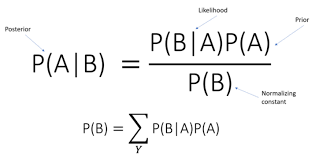

Donde
- **P(A|B):** Es la probailidad a posteriori, que es la probabilidad posterior de la clase ( objetivo ) dado el predictor ( atributo ).
- **P(B):** Es la probailidad a priori de la clase
- **P(B|A):** Es la probabilidad que es la probabilidad de la clase dada del predictor 
- **P(A):** Es la probailidad a priori de el predictor

Para entrenar Naive Bayes en el ejemplo, vamos a usar las criticas de peliculas en el paquete corpus de nltk, que las clasifica como positivas o negativas, y por lo tanto es un problema de clasificación binaria

Vamos a crear una función para 

Para entrenar al algotirmo, necesitamos una lista de caracteristicas, de la forma [(featureset, label)], donde featureset es un diccionario y la labrel es la etiqueta de la clase.
Vamos a crear la función, **label_corpus()**, que cogera como parametros el corpus de **movie_reviews**, y una función para crear la lista de palabras, y retornara un diccionario, de la forma  {label: [featureset]}

In [ ]:
# Esta funcion crea un mapa donde aparecen las clases -> Diccionario de palabras que contrubuyen a la clase
import collections
def label_corpus(corp, feature_detector=bow):
  label_feats = collections.defaultdict(list)
  for label in corp.categories(): # Para todas las categorias encontradas en el corpus
    for fileid in corp.fileids(categories=[label]): # 
      feats = feature_detector(corp.words(fileids=[fileid]))
      label_feats[label].append(feats)
  return label_feats


Despues crearemos la función **split()** dividiremos la entrada en conjuntos de entrenamiento y de test

In [ ]:
# Esta funcion divide el corpus seun el porcentaje pasado en split
def split(lfeats, split=0.75):
  train_feats = []
  test_feats = []
  for label, feats in lfeats.items():
    cutoff = int(len(feats) * split)
    train_feats.extend([(feat, label) for feat in feats[:cutoff]])
    test_feats.extend([(feat, label) for feat in feats[cutoff:]])
  return train_feats, test_feats


Ahora vamos a usar todo lo anterior

Leemos los datos de las pelicuals etiquetados

In [ ]:
from nltk.corpus import movie_reviews
movie_reviews.categories()


['neg', 'pos']

In [ ]:
movie_reviews.fileids() # Ver lista de comentarios

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt',
 'neg/cv010_29063.txt',
 'neg/cv011_13044.txt',
 'neg/cv012_29411.txt',
 'neg/cv013_10494.txt',
 'neg/cv014_15600.txt',
 'neg/cv015_29356.txt',
 'neg/cv016_4348.txt',
 'neg/cv017_23487.txt',
 'neg/cv018_21672.txt',
 'neg/cv019_16117.txt',
 'neg/cv020_9234.txt',
 'neg/cv021_17313.txt',
 'neg/cv022_14227.txt',
 'neg/cv023_13847.txt',
 'neg/cv024_7033.txt',
 'neg/cv025_29825.txt',
 'neg/cv026_29229.txt',
 'neg/cv027_26270.txt',
 'neg/cv028_26964.txt',
 'neg/cv029_19943.txt',
 'neg/cv030_22893.txt',
 'neg/cv031_19540.txt',
 'neg/cv032_23718.txt',
 'neg/cv033_25680.txt',
 'neg/cv034_29446.txt',
 'neg/cv035_3343.txt',
 'neg/cv036_18385.txt',
 'neg/cv037_19798.txt',
 'neg/cv038_9781.txt',
 'neg/cv039_5963.txt',
 'neg/cv040_8829.txt',
 'neg/cv041_22364.txt',


In [ ]:
movie_reviews.raw('neg/cv000_29416.txt') # Leer un comentario concreto

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe

Invocamos label_corpus con los comentarios de las peliculas

In [ ]:
lfeats = label_corpus(movie_reviews)
print(lfeats.keys())
for key in lfeats.keys():
  print(f'{key} --> {len(lfeats[key])} Palabras en el map')


dict_keys(['neg', 'pos'])
neg --> 1000 Palabras en el map
pos --> 1000 Palabras en el map


Dividimos el conjunto de datos entre entrenamiento y test

In [ ]:
train_feats, test_feats = split(lfeats, split=0.75)
print('Longitud de entrenamiento',len(train_feats))
print('Longitud de test',len(test_feats))

Longitud de entrenamiento 1500
Longitud de test 500


Ahora vamos a usar un algortimo **NaiveBayesClassifier** para realizar la clasificacion

Podemos encontrar clasificadores en el paquete **clasify** de nltk

In [ ]:
from nltk.classify import NaiveBayesClassifier
NBC = NaiveBayesClassifier.train(train_feats)
NBC.labels()

['neg', 'pos']

Precisión del modelo

In [ ]:
print(nltk.classify.accuracy(NBC, test_feats))

0.728


### Arbol de decisión

Los arboles de decisión intentan encontrar reglas en el corpus para establecer la decisión

En este caso la clase que lo implementa es **DecisionTreeClassifier**


In [ ]:
from nltk.classify import DecisionTreeClassifier, accuracy
decisiont_classifier = DecisionTreeClassifier.train(train_feats, binary=True,
entropy_cutoff=0.8, depth_cutoff=5, support_cutoff=30)
accuracy(decisiont_classifier, test_feats)

KeyboardInterrupt: ignored

### Modelos de Scikit-learn

Una de las mejores herramientas para machine learning es la libraría **Scikit-learn**

En vaz de usar **Scikit-learn** directamente, podemos usarlo mediante la clase **SklearnClassifier**, que encapsula llamadas a la libreria **Scikit-learn**

In [ ]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB
sklearn_classifier = SklearnClassifier(MultinomialNB())
sklearn_classifier.train(train_feats)
# <SklearnClassifier(MultinomialNB(alpha=1.0,class_prior=None,fit_prior=True))>
accuracy(sklearn_classifier, test_feats)


0.83